In [10]:
######## Create, Train, and Predict Models

# Loads train, test, and val datasets
# Instantiates Models
# Trains Models
# Predicts using Models

Import All Required Modules

In [93]:
import sys

# Manually add the project root to sys.path
sys.path.append('/Users/joaquinuriarte/Documents/GitHub/sports-betting/')

# === STEP 0: Imports
from modules.model_manager.trainer.trainer import Trainer
from modules.model_manager.predictor.predictor import Predictor
from modules.model_manager.factories.model_factory import ModelFactory
from modules.model_manager.helpers.configuration_loader import ConfigurationLoader as MMConfigLoader
from modules.model_manager.model_manager import ModelManager
from sklearn.model_selection import KFold
from modules.data_structures.model_dataset import ModelDataset
from model_binaries.utils.binary_utils import save_entity, load_entity, cross_val_train, compute_f1, graph_entity, assess_dataset_balance, evaluate_modelV01_predictions, plot_margin_distributions, swap_team_sides_in_dataset

In [106]:
# === STEP 1: Dependency Instantiations And Global Variable Declarations

## === MODEL MANAGER
yaml_path0 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_000.yaml'
yaml_path1 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_001.yaml'
yaml_path2 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_002.yaml'
yaml_path3 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_003.yaml'
yaml_path4 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_004.yaml'
yaml_path5 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_005.yaml'
yaml_path6 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_006.yaml'
yaml_path10 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_010.yaml'
yaml_path11 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_011.yaml'
yaml_path12 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_012.yaml'

yaml_path13333 = 'tune alpha, then add new is home feature, no reg, reduce constraints'


checkpoint = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/models'
trainer = Trainer(checkpoint)
predictor = Predictor()
model_factory = ModelFactory()
mm_configuration_loader = MMConfigLoader()

Load Train Datasets into Memory

In [95]:
# File path to load train, test, and val datasets
train_test_val_folder_path = "/Users/joaquinuriarte/Documents/GitHub/sports-betting/processed_datasets/model_v01/scaler"

In [96]:
train_dataset = load_entity(train_test_val_folder_path, "scaled_train.pkl")
validation_dataset = load_entity(train_test_val_folder_path, "scaled_val.pkl")

In [97]:
randomized_train_dataset = swap_team_sides_in_dataset(train_dataset, team_a_prefix="A_", team_b_prefix="B_", label_a_name="final_score_A", label_b_name="final_score_B", add_home_feature=False, swap_probability=.5)
randomized_val_dataset = swap_team_sides_in_dataset(validation_dataset, team_a_prefix="A_", team_b_prefix="B_", label_a_name="final_score_A", label_b_name="final_score_B", add_home_feature=False, swap_probability=.5)

Load & Train on predefined trained and val datasets

In [98]:
# === STEP 4: MODEL MANAGER
yamls = [yaml_path11]
model_manager = ModelManager(trainer, predictor, model_factory, mm_configuration_loader)

In [99]:
models = model_manager.create_models(yamls)

In [100]:
model_manager.train(models, [(randomized_train_dataset, randomized_val_dataset)], save_after_training=True)

INFO:root:Training model '9bf9f8ebc7eb6e7210b14b196174fc69' for 20 epochs with batch size 32.


Epoch 1/20
637/637 [==============================] - 24s 32ms/step - loss: 737.7978 - mse: 731.7838 - mae: 17.3355 - val_loss: 277.4836 - val_mse: 273.8895 - val_mae: 13.2083
Epoch 2/20
637/637 [==============================] - 21s 33ms/step - loss: 193.0562 - mse: 189.6763 - mae: 10.9409 - val_loss: 185.6111 - val_mse: 183.2959 - val_mae: 10.7765
Epoch 3/20
637/637 [==============================] - 22s 34ms/step - loss: 178.9588 - mse: 175.2587 - mae: 10.5498 - val_loss: 258.8631 - val_mse: 255.9131 - val_mae: 12.7809
Epoch 4/20
637/637 [==============================] - 23s 37ms/step - loss: 172.7717 - mse: 169.2234 - mae: 10.3484 - val_loss: 206.2596 - val_mse: 202.2115 - val_mae: 11.3420
Epoch 5/20
637/637 [==============================] - 22s 35ms/step - loss: 172.0599 - mse: 168.3751 - mae: 10.3203 - val_loss: 326.2173 - val_mse: 320.3106 - val_mae: 14.5479
Epoch 6/20
637/637 [==============================] - 23s 36ms/step - loss: 173.0731 - mse: 169.4656 - mae: 10.3660 - va

INFO:root:Model '9bf9f8ebc7eb6e7210b14b196174fc69': Finished training.


Model saved successfully at: models/9bf9f8ebc7eb6e7210b14b196174fc69/model_weights_9bf9f8ebc7eb6e7210b14b196174fc69.pth


Assess Performance

In [101]:
predictions = models[0].predict(randomized_val_dataset.examples, return_target_labels=True)

In [102]:
# Get all metrics for trained model on val dataset predictions
metrics = evaluate_modelV01_predictions(predictions, "final_score_A", "final_score_B", "target_final_score_A", "target_final_score_B")
metrics

{'mse_A': 204.33781,
 'mse_B': 212.48355,
 'mae_A': 11.52644,
 'mae_B': 11.750151,
 'combined_mse': 208.41069,
 'combined_mae': 11.638295,
 'accuracy': 0.5098193244304792,
 'precision': 0.5426829268292683,
 'recall': 0.0705229793977813,
 'f1': 0.12482468443197754,
 'auc': 0.5426639463641256}

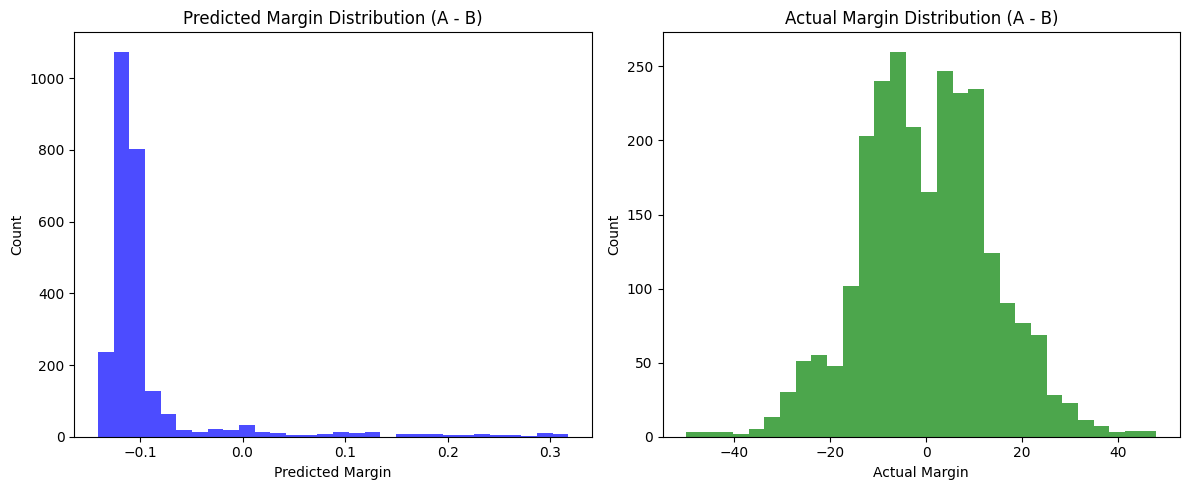

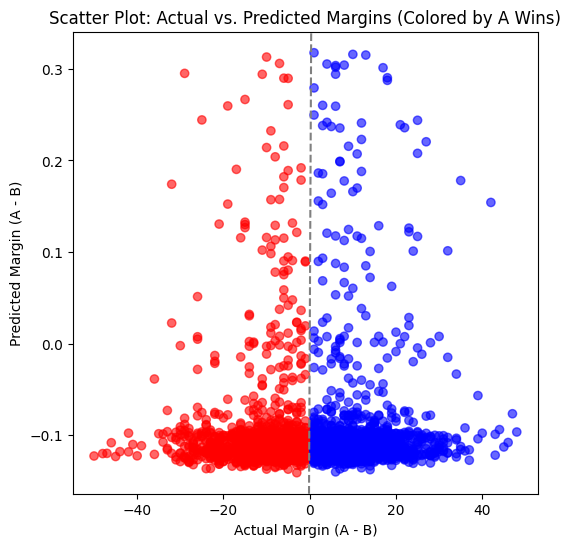

In [103]:
plot_margin_distributions(predictions, "final_score_A", "final_score_B", "target_final_score_A", "target_final_score_B")

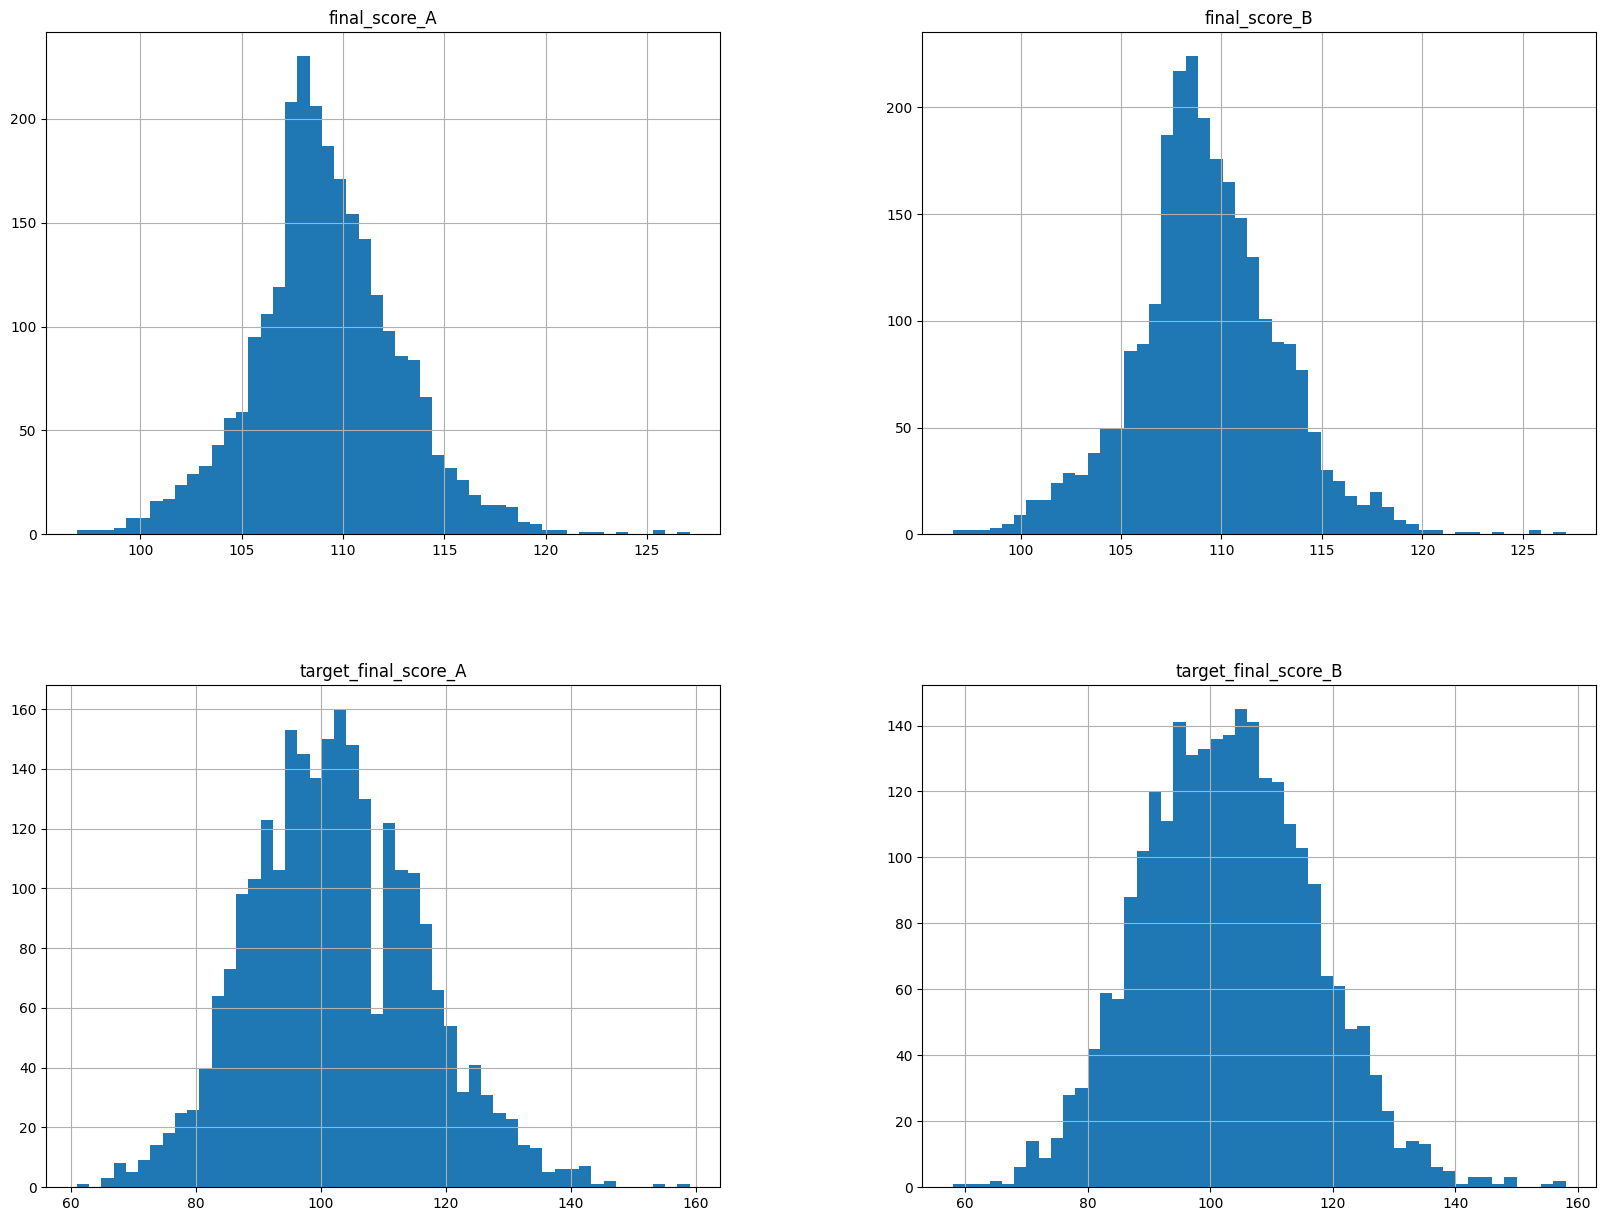

In [104]:
# Graph distribution of predictions against labels 
graph_entity(predictions=predictions,bins=50)

In [105]:
# Print actual predictions against labels
predictions

,final_score_A,final_score_B,target_final_score_A,target_final_score_B
0,114.189987,114.286850,90.0,100.0
1,107.596474,107.718369,113.0,85.0
2,108.899567,109.031349,92.0,84.0
3,110.274849,110.400719,100.0,89.0
4,113.619431,113.723160,113.0,105.0
...,...,...,...,...
2541,106.384033,106.499619,112.0,101.0
2542,110.533928,110.653793,98.0,95.0
2543,104.512726,104.604805,99.0,100.0
2544,108.629066,108.742706,124.0,105.0


Launch Tensorboard

In [ ]:
%tensorboard --logdir=./logs

CROSS VALIDATION ALTERNATIVE

Create and Train Models Using KFold Cross Validation

In [24]:
# === STEP 4: MODEL MANAGER
yamls = [yaml_path3]
model_manager = ModelManager(trainer, predictor, model_factory, mm_configuration_loader)

Get Averaged Metrics for KFold

In [ ]:
avg_metrics = cross_val_train(model_manager=model_manager, yamls=yamls, train_dataset=train_dataset, n_splits=5)
f1 = compute_f1(avg_metrics["val_precision"], avg_metrics["val_recall"])
print(avg_metrics)
print(f1)